In [1]:
import sys
import os

# Add parent directory to path
sys.path.append(os.path.abspath('.'))

import warnings
warnings.filterwarnings("ignore", message="kurtosistest only valid for n>=20")

from statsmodels.iolib.summary2 import summary_col
from utils.load_data import load_china_gdp, read_china_nlt, combine_ntl_gdp_data 
from utils.plots import plot_ntl_and_gdp
from utils.analysis import run_ols_regressions, run_regression_diagnostics


# Introduction

This selection is a part of a broader body of work on the slowdown of the Chinese economy. It builds on the argument that fraudulent reporting may have contributed to over reporting within China which is an issue that appears to have diminished following institutional reforms implemented after Xi Jinping’s inauguration. A both a full biblilograhy can be found within the references folder and the raw data can be found in /data. 


## Xi's changes to Promotion Tournament

The fundamental approach to political steering shifted from the competition-oriented, "soft" steering to a "hard" steering with the implementation of the "Top-level design," Xi has also sought to reform the existing incentive system to enhance his capacity to implement his objectives and initiatives. This ultimately meant a change in the 'self-enforced' mechanism of subordinate actors [Gündoğan 2024]. Aligned with the overarching guideline of the Several Major Issues of Comprehensively Deepening Reform during the Third Plenary Session, the Department of the Central Committee issued a *Notice on Improving the Performance Evaluation of Local Party and Government Leaders and Leading Cadres* in late 2013. This marked a pivotal transformation in personnel management, departing from the previous emphasis solely on economic performance [Luo et al. 2021]. The notice stressed several key points:

-  The performance evaluation should highlight the scientific development orientation.
-  Improve performance evaluation indicators. 
-  Regional GDP will no longer be assessed for restricted development areas. 
-  Strengthen the assessment of the government debt situation. 
-  Strengthen the comprehensive analysis of political achievements. 
-  The appointment of officials cannot simply consider regional GDP and its growth rate.
-  Implement accountability.
-  Standardize and simplify various work assessments.
-  A new criteria to new cadres’ appointments, which requires to pay more attention to the indicator of people’s livelihood (i.e., household income).

The central government has progressively revised the criteria for target contracts and cadre evaluations, extending these changes throughout all levels of governance. The common theme from the top leadership being that economic growth can no longer compensate for shortcomings in other policy areas. There is now increased scrutiny of cadres' performance in key areas such as public service delivery and environmental protection, shifting away from the previous emphasis solely on GDP growth. These adjustments introduce greater complexity and heavier responsibilities for local administrators. Success can lead to advancement, while failure now carries the risk of demotion. Unlike in the past, where demotion was rarely enforced, except as a disciplinary measure during party inspections, recent central guidelines issued in 2015 and adopted by most subnational governments have made demotion a tangible consequence of underperformance [Ahlers et al. 2016]. This alteration is notable as there is a clear distinction between 'positive' and 'negative' steering instruments. While positive steering instruments are incentives designed to encourage, motivate, or stimulate actors to change their behavior by rewarding them, negative steering instruments are sanctions by which steering subjects attempt to force steering objects to conform to their preconceived norms and expectations [Gundogan et al. 2024]. Therefore, the enforcement of "negative" steering instruments further highlights the fundamental difference in the regime compared to previous administrations.

When we review the empirical evidence, it is unsurprising to find that the notice had an immediate impact on the amplification of growth targets. The decrease in the size of the growth targets, along with the targets no longer being consistently larger than the central targets in the previous 5-year plans, indicates that provincial leaders have adjusted to a new performance evaluation regime. Turning to the analysis of the incentive role of personnel control in China (2000-2018), we observe distinct patterns. The probability of promotion for prefectural leaders tends to increase with their annual economic performance, yet it decreases with relative economic performance. In contrast, for municipal party secretaries, absolute economic performance proves pivotal in cities with higher income levels or larger populations, whereas peer effects carry more weight in smaller cities. Additionally, the geographical weighted economic performance of neighboring cities emerges as a significant explanatory variable, underscoring the relative impact of economic performance, this is in concurrence with [Li et al. 2018]. However, the factors shifted within the promotion mechanism, with this shift notably occurring around the Third Plenary Session of the 18th CPC Central Committee [Luo et al. 2021].


## The Idea and Methodological Background

GDP and growth estimates in developing countries are commonly accepted to have problems and have the risk of being manipulated. Some of the more innocent issues arise from developing countries having lower statistical capacity, are often associated with weaker institutional frameworks and governance, or having significant informal sectors that are difficult to measure accurately, particularly in economies heavily reliant on agriculture [Angrist et al. 2021]. The more insidious motives for manipulating key economic indicators arise from economic growth commonly being used as a measure of the success of an economy and the performance of the incumbent leader. Within democracies, the electorate has the ability to hold incumbent leadership politically accountable through behavior at the polls [Ashworth et al. 2012]. However, within autocracies, salient economic statistics can act as signals to the population, triggering mass political action against the ruling regime [Edmond et al. 2013]. There exists a large amount of literature regarding the interconnections of economic conditions and their effects on political mobilization and regime change, both within democracies and autocracies.

These issues are magnified within China both due to the institutional reasons discussed and because, since 1989, democratic political reform, freedom of the press, pluralism, and other universal values have not been embraced in Chinese society under CCP rule. Chinese official media and scholars have labeled this phenomenon as "the symptom of high growth reliance." This suggests that high economic growth has become the primary method to alleviate social conflicts and uphold social stability. Consequently, any slowdowns in economic growth perceived or real, could potentially lead to instabilities in society. As a result, the top leaders of the party have been increasingly focused on economic growth, making it the core value and main priority in the governing of China [He 2020].

This trend is also found when we review the empirical analysis; here we observe that at the prefecture (province) level, the number of observations of just meeting or beating targets is almost five (four) times the number of observations of just missing them [Lyu et al. 2018]. A different study has shown that GDP growth from 2008–2016 is 1.7 percentage points lower and the investment and savings rate in 2016 is 7 percentage points lower than the values that have been claimed [Chen et al. 2019]. Other studies argue that the cumulative GDP growth of China between 1997 and 2001 was not more than one-third of the official claims and possibly much smaller [Rawski et al. 2001].

These claims regarding falsification of GDP and economic data in general have been almost universally recognized since the WikiLeaks' publication regarding the premier, Li Keqiang in 2010. His statement has led to the creation of the so-called Li Keqiang index. Although the composition of this index can vary, it typically consists of a simple average of three key indicators: electricity usage, bank loans, and rail freight [Clark et al. 2020]. However, other methodologies are being used to estimate the Chinese GDP; one such method involves using satellite-recorded nighttime lights, as it is widely acknowledged that the intensity of lights is strongly associated with indicators of economic activity, such as GDP measured both in levels and growth rates [Henderson et al. 2012]. It should be noted that systematic differences between democracies and autocracies have been observed in the analysis of this type of geospatial data. Where the elasticity of official GDP figures to nighttime lights has been shown to be systematically larger in more authoritarian regimes [Martinez et al. 2017]. Therefore, for these reasons, we should exercise caution both in assuming the accuracy of reported GDP figures from the National Bureau of Statistics of China and in presuming that we can accurately identify the "true" GDP or growth rate of the economy, as it is likely unobservable.


### Hypotese

In this section, we will investigate whether the reported GDP numbers have improved alignment with the nightlight data in the Xi era. The methodology we employ is well established and will be based on [Chen et al. 2011], [Henderson et al. 2012], and [Hu et al. 2022]. Like other measurement approaches, the Nightlight (NTL) approach is imperfect, as there are naturally a number of measurement errors for standard output and luminosity. Limitations in the sensor of these lights create saturation problems in central urban areas, potentially hampering their ability to predict variations in economic activity in rich, high-density areas. Furthermore, it is argued that in low-density rural areas, NTL are poor predictors of economic activity [Gibson et al. 2021]. In other cases, an increase in certain economic output, such as software design or other advanced products, does not necessarily result in an increase in NTL. However, research has shown a strong correlation between NTL and economic activity in Lower-Income, Lower-Middle-Income, and Upper-Middle-Income countries [Angrist et al. 2021]. Therefore, although we do not expect perfect explanatory ability due to omitted variables in this exercise, we will assess the increase in the model's explanatory power in the pre-Notice and post-Notice era. The model is as follows:

$$
y_i = y^*_i + \epsilon_{y,i}
$$

With $y_i$ being the observed GDP and $y^*_i$ being the "true" GDP, $\epsilon_{y,i}$ denotes the classical measurement error and "GDP Management" in GDP recorded in national income accounts. The relationship between growth of lights and growth of true income is given by:

$$
x_i = \beta y_i + \epsilon_{x,j}
$$

The underlying assumption is that there is a simple constant elasticity relationship between total observable light in a region ($X$) and total income (GDP). The error term, $\epsilon_{x,j}$, encapsulates the noise in the observed light's growth as a reflection of GDP growth. This noise encompasses various factors, including measurement errors in light data—representing the disparity between the actual light emitted into space and what the satellite registers. As there is no reason to believe the classical measurement error and GDP Management are related to the measurement errors of the satellite, we assume that:

$$
\text{Cov}(\epsilon_x,\epsilon_y)=0
$$

Collecting equations:

$$
x_i = \beta (y^*_i + \epsilon_{y,i}) + \epsilon_{x,j} \quad \Rightarrow \quad y^*_i = \frac{1}{\beta} x_i + \epsilon_{x,j} + \epsilon_{y,i} \quad \Rightarrow \quad y^*_i = \tilde{\beta} x_i + \tilde{\epsilon_i}
$$

Hence, the coefficient $\tilde{\beta}$ from the regression appears to be biased as a coefficient of the "true" GDP. However, since our objective involves attempting to evaluate a decrease in $\tilde{\epsilon}$ and does not involve predicting the "true" GDP, we will not address this bias. Instead, we will examine $R^2$ and $R^2_{\text{adj}}$, which range from 0 to 1. A value of 0 indicates that the independent variables explain none of the variance in the dependent variable, while a value of 1 indicates that the independent variables explain all of the variance.

$$
R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}, \quad SS_{\text{res}} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2, \quad SS_{\text{tot}} = \sum_{i=1}^{n} (y_i - \bar{y})^2
$$

$$
R^2_{\text{adj}}= 1 - \frac{(1 - R^2) \cdot (n - 1)}{n - k - 1}
$$

Where $n$ is the number of observations in the sample and $k$ is the number of independent variables in the regression model.


In [2]:
gdp_china = load_china_gdp()
data_1992_2012, data_2013_2021 = read_china_nlt()
combined_df_1, combined_df_2, full_combined_df = combine_ntl_gdp_data(data_1992_2012, data_2013_2021, gdp_china)

### Data

For the exercise I have collected and processed three different types of data, one NTL dataset for the period 1992-2012, a second NTL dataset for the period 2012-2021 and the World Bank China GDP data. The code for accessing and processing the satellite data are written in simple Java which can be used in the Google Earth Engine. 

In regards to the underlying data, for the period spanning from 1992 to 2012, we will utilize data from the Defense Meteorological Program (DMSP) Operational Line-Scan System (OLS), which possessed the capability to detect visible and near-infrared (VNIR) emission sources during nighttime. Specifically, we will focus on the band within the data set known as Stable Lights, which represents the average of visible lights emanating from cities, towns, and other areas with persistent lighting, while excluding ephemeral events such as fires. Any background noise present in the data has been identified and substituted with zero values.

In the subsequent period covering 2013 to 2021, our analysis will rely on data obtained from the Visible Infrared Imaging Radiometer Suite (VIIRS) instruments, which are installed aboard both the Joint NASA/NOAA Suomi National Polar Orbiting Partnership (Suomi NPP) and NOAA-20 satellites. These instruments provide daily measurements of nocturnal visible and near-infrared (NIR) light. Similarly to the previous data set, a filtering process has been applied to the NIR light data to ensure consistency in our analysis.

When examining the data depicted in the figures below, it becomes apparent that it exhibits an exponential trend. For purposes of scale, we also take the logarithm of the observed luminosity. Consequently, we have validated the assumption of a linear relationship between the logarithm of the reported GDP and the logarithm of the observed luminosity. 

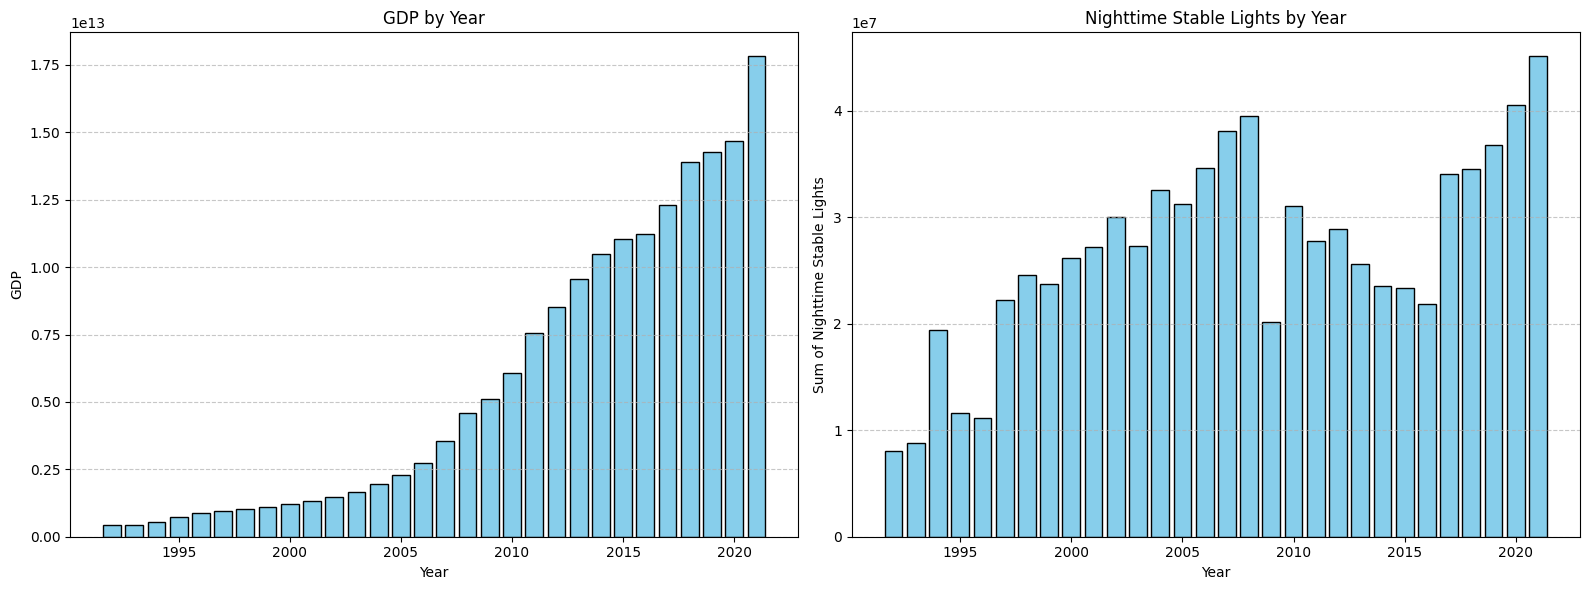

In [3]:
plot_ntl_and_gdp(full_combined_df)

In [4]:
model_1, model_2 = run_ols_regressions(combined_df_1, combined_df_2)

summary_col(
    [model_1, model_2],
    stars=True,
    model_names=['Pre-Xi-Era Sample', 'Xi-Era Sample'],
    info_dict={
        'R-squared': lambda x: f"{x.rsquared:.3f}",
        'Adj. R-squared': lambda x: f"{x.rsquared_adj:.3f}",
        'N': lambda x: f"{int(x.nobs)}"
    }
)

,Pre-Xi-Era Sample,Xi-Era Sample
Intercept,4.7865*,18.7509***
,(2.4730),(2.1252)
"Q(""Log(Sum of Nighttime stable Lights)"")",1.3808***,0.6620***
,(0.1493),(0.1227)
R-squared,0.4985,0.8160
R-squared Adj.,0.4721,0.7898
Adj. R-squared,0.472,0.790
N,21,9
R-squared,0.498,0.816


### Improved Explanatory Power of Nighttime Lights and the Reliability of Chinese GDP Data

As depicted in the model summaries above, both $R^2$ and Adjusted $R^2$ have increased markedly, from 0.498 to 0.816 and from 0.472 to 0.790, respectively. This signifies a significant improvement in the explanatory power of NTL. Such enhancement suggests that the reported GDP figures are now closer to their expected values, indicating a potential reduction in either statistical distortion or GDP manipulation in the post-Notice era compared to the pre-Notice period. This result aligns with the conclusions drawn by [Fernald et al. 2021], who similarly observed an improvement in the reliability of Chinese statistics over time. However, they noted a potential issue with the smoothness of GDP data from 2013 to 2019 toward the end of their sample period.

In [5]:
print("Model 1992-2012")
run_regression_diagnostics(model_1)
print("\nModel 2013-2021")
run_regression_diagnostics(model_2)


Model 1992-2012

Diagnostic Test Results:
Test                      Statistic    p-value      Result  
-----------------------------------------------------------------
RESET (F-stat)            0.2316       0.6361       Pass    
Breusch-Pagan             0.4990       0.4799       Pass    
Shapiro-Wilk              0.8813       0.0154       Fail    
Jarque-Bera               2.6856       0.2611       Pass    
Durbin-Watson             0.4862       N/A          –       

Model 2013-2021

Diagnostic Test Results:
Test                      Statistic    p-value      Result  
-----------------------------------------------------------------
RESET (F-stat)            5.7768       0.0530       Pass    
Breusch-Pagan             0.7294       0.3931       Pass    
Shapiro-Wilk              0.9657       0.8553       Pass    
Jarque-Bera               0.4451       0.8005       Pass    
Durbin-Watson             1.7297       N/A          –       


### Diagnostic Testing and Robust Inference in the Presence of Heteroskedasticity

Above we perform a comprehensive battery of tests to evaluate various aspects of our regression model. This is important, if not mandatory, to ensure that the statistical basis for a model is rigorously tested. The following tests, do exactly that, with the Breusch-Pagan test for Heteroscedasticity assessing whether there is homoscedasticity, with the null hypothesis assuming constant variance across observations. The Jarque-Bera test for normality of residuals examines the normality of the residuals, with the null hypothesis assuming normal distribution. The Durbin-Watson test for autocorrelation of error terms investigates whether there is first-order serial correlation in the residuals. Where the null hypothesis does not suggest that there is a correlation between the errors. Finally, Ramsey's RESET test for omitted variable bias assesses whether the model is correctly specified, with the null hypothesis stating no omitted variable bias.

We observe that both models pass these tests, except for the 1992-2012 Shapiro-Wilk test. When the assumption of homoskedasticity (constant variance of errors) is violated in an OLS regression, the usual OLS standard errors become unreliable. In such cases, robust standard errors provide consistent estimates of the variance-covariance matrix.

The classical OLS variance-covariance estimator is:
$$
\mathbb{V}[\hat{\beta}] = \sigma^2 (X^\top X)^{-1}
$$

Under heteroskedasticity, we cannot assume $\mathbb{E}[uu^\top] = \sigma^2 I$. Instead, a robust estimator is needed.

The HC1 robust standard error estimator (White's correction with small sample adjustment) is given by:
$$
\mathbb{V}{\text{HC1}}[\hat{\beta}] = (X^\top X)^{-1} \left( \sum{i=1}^n \hat{u}_i^2 x_i x_i^\top \right) (X^\top X)^{-1} \cdot \frac{n}{n - k}
$$

Where:
- $\hat{u}_i$ is the residual for observation $i$
- $x_i$ is the vector of regressors for observation $i$
- $n$ is the number of observations
- $k$ is the number of estimated parameters (including the intercept)
- $\frac{n}{n-k}$ is a degrees-of-freedom correction specific to HC1


This adjustment is implemented in packages such as *statsmodels* with *cov_type="HC1"*, and it helps to correct for finite sample bias in the heteroskedasticity-consistent covariance matrix. Nonetheless, the Non-Normality does not affect the interpretaion of $R^2$ and the model has been fitted with robust standard errors.

$$
\mathbb{V}[\hat{\beta}] = \sigma^2 (X^\top X)^{-1}
$$



# Conclusion

This analysis has evaluated the relationship between official Chinese GDP figures and nighttime satellite light intensity, a widely used proxy for real economic activity, using ordinary least squares (OLS) regression on both the Pre and Post Xi-era Samples.

The results demonstrate a statistically significant and economically meaningful relationship between nightlight emissions and reported GDP. In the full sample ($n=21$), a 1\% increase in stable nightlight intensity is associated with a 1.38\% increase in reported GDP, with an $R^2$ of 0.498. However, this model displays signs of residual autocorrelation and some deviation from normality.

In contrast, the Xi-era subsample ($n=9$) yields a lower elasticity estimate of 0.66, but a substantially improved model fit with an $R^2$ of 0.816. Diagnostic tests show no signs of model misspecification or heteroskedasticity, and residuals behave more regularly. These results may reflect improved measurement practices, increased transparency, or structural changes in China’s economy during the Xi administration.

Overall, the findings reinforce the validity of using nightlight data as a credibility check on macroeconomic statistics. The improved fit and behavior in the recent subsample suggest that the alignment between officially reported GDP and independent physical indicators has strengthened in recent years. Future work could explore this relationship using instrumental variable methods, panel data, or dynamic time-series models to enhance robustness and granularity.
